### Import Library

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data["v1"].describe()

count     5572
unique       2
top        ham
freq      4825
Name: v1, dtype: object

In [5]:
#Drop column and name change
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [6]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [9]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"], test_size = 0.2, random_state = 10)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vect = CountVectorizer()

In [15]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer

In [16]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['zyada', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


In [18]:
X_train_df = vect.transform(X_train)

In [19]:
X_test_df = vect.transform(X_test)

In [21]:
ham_words = ''
spam_words = ''
spam = data[data.label_num == 1]
ham = data[data.label_num == 0]

In [27]:
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')

In [39]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '


In [40]:
from wordcloud import WordCloud

In [41]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

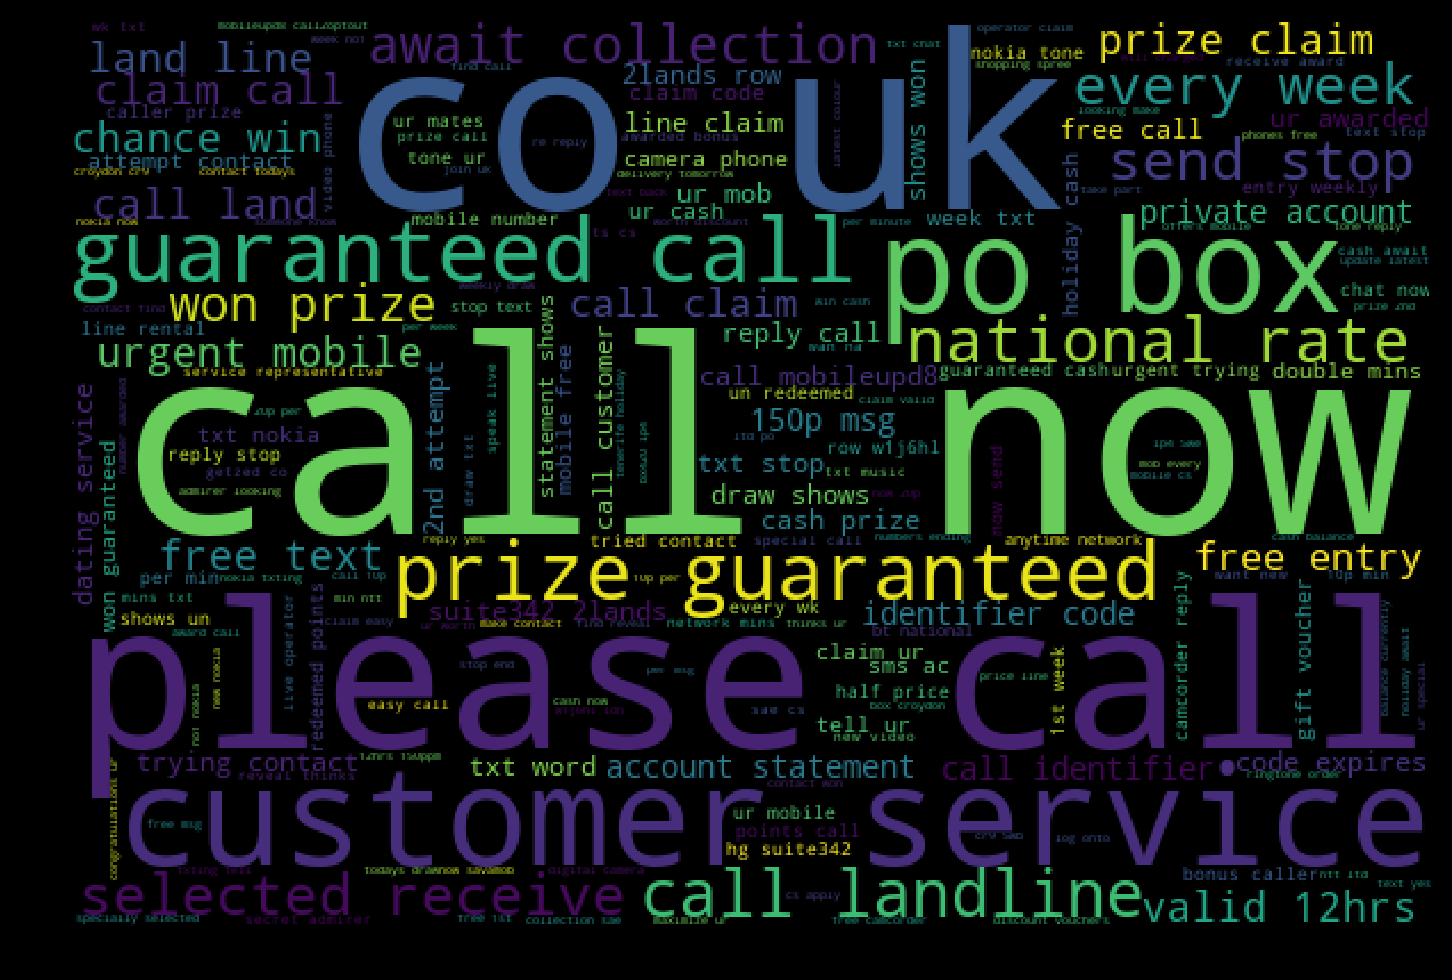

In [43]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

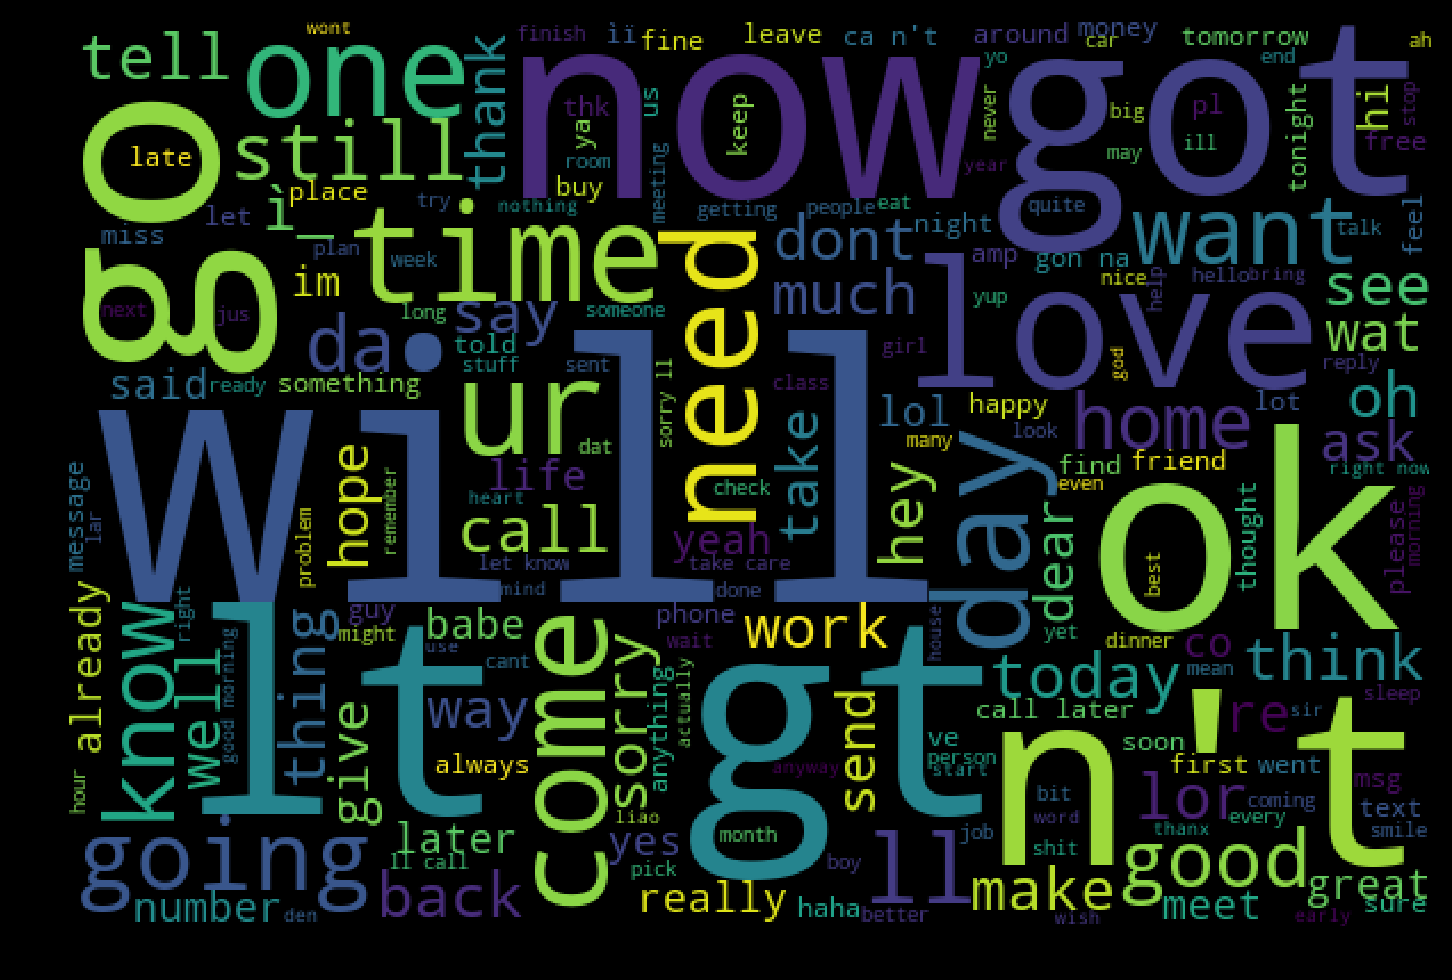

In [44]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
prediction["Multinomial"] = model.predict(X_test_df)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,prediction["Multinomial"])

0.9883408071748879

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
prediction["Logistic"] = model.predict(X_test_df)

In [55]:
accuracy_score(y_test,prediction["Logistic"])

0.9802690582959641

### KNN classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
prediction["knn"] = model.predict(X_test_df)

In [58]:
accuracy_score(y_test,prediction["knn"])

0.9121076233183857

### Random Forest classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
prediction["random_forest"] = model.predict(X_test_df)

In [61]:
accuracy_score(y_test,prediction["random_forest"])

0.9623318385650225

### AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [63]:
prediction["adaboost"] = model.predict(X_test_df)

In [64]:
accuracy_score(y_test,prediction["adaboost"])

0.967713004484305

### Naive Bayes has given the best accuracy. 
However K-NN has very low accuracy, so Let's try to tune the parameters of  k-NN using GridSearchCV

In [66]:
# Parameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
k_range = np.arange(1,30)
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [67]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [68]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
grid.best_params_

{'n_neighbors': 1}

In [51]:
grid.best_score_

0.9461521202602647

In [52]:
grid.grid_scores_

/home/rahul/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94615, std: 0.00449, params: {'n_neighbors': 1},
 mean: 0.92259, std: 0.00288, params: {'n_neighbors': 2},
 mean: 0.92349, std: 0.00226, params: {'n_neighbors': 3},
 mean: 0.90554, std: 0.00117, params: {'n_neighbors': 4},
 mean: 0.90621, std: 0.00065, params: {'n_neighbors': 5},
 mean: 0.89410, std: 0.00060, params: {'n_neighbors': 6},
 mean: 0.89455, std: 0.00062, params: {'n_neighbors': 7},
 mean: 0.88580, std: 0.00141, params: {'n_neighbors': 8},
 mean: 0.88602, std: 0.00142, params: {'n_neighbors': 9},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 10},
 mean: 0.88198, std: 0.00262, params: {'n_neighbors': 11},
 mean: 0.87660, std: 0.00210, params: {'n_neighbors': 12},
 mean: 0.87705, std: 0.00230, params: {'n_neighbors': 13},
 mean: 0.87256, std: 0.00223, params: {'n_neighbors': 14},
 mean: 0.87278, std: 0.00253, params: {'n_neighbors': 15},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 16},
 mean: 0.87009, std: 0.00051, params: {'n_neighbors': 17},
 mean:

In [53]:
# Model Evaluation
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       965
       Spam       0.97      0.95      0.96       150

avg / total       0.99      0.99      0.99      1115



In [54]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

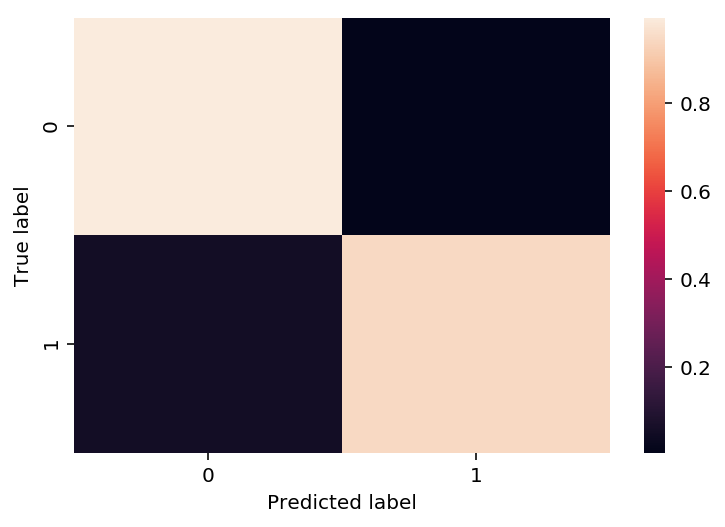

In [55]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [56]:
# Future works
print(conf_mat)

[[960   5]
 [  8 142]]


In [57]:
#By seeing the above confusion matrix, it is clear that 5 Ham are mis classified as Spam, and 8 Spam are 
#misclassified as Ham. Let'see what are those misclassified text messages. Looking those messages may help us to 
#come up with more advanced feature engineering.

In [58]:
pd.set_option('display.max_colwidth', -1)

In [59]:
# Misclassified as Spam
X_test[y_test < prediction["Multinomial"]]

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: text, dtype: object

In [60]:
# Misclassfied as Ham
X_test[y_test > prediction["Multinomial"] ]

5035    You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt       
2574    Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.   
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
68      Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"                                                                            
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                          
4211    Missed call alert. These numbers called but left no message. 07008009200                                                                                    
3572    Yo